<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/Stateful_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4

--2023-05-15 20:19:19--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4 [following]
--2023-05-15 20:19:19--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82346 (80K) [application/octet-stream]
Saving to: ‘processing-movie.mp4’

processing-movie.mp 100%[==================

In [ ]:
import cv2
import os

# Path to the video file
video_path = 'processing-movie.mp4'

# Open the video file
video = cv2.VideoCapture(video_path)

# Create the folder to save the images
output_folder = 'training_images'
os.makedirs(output_folder, exist_ok=True)

frame_number = 0

while True:
    # Set the frame position to the desired frame number
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    success, frame = video.read()

    if success:
        # Save the frame as an image
        image_path = os.path.join(output_folder, f'{frame_number}.jpg')
        cv2.imwrite(image_path, frame)
        print(f"Frame {frame_number} saved successfully: {image_path}")
        frame_number += 1
    else:
        print("End of video reached.")
        break


In [ ]:
!zip -r training_images.zip training_images

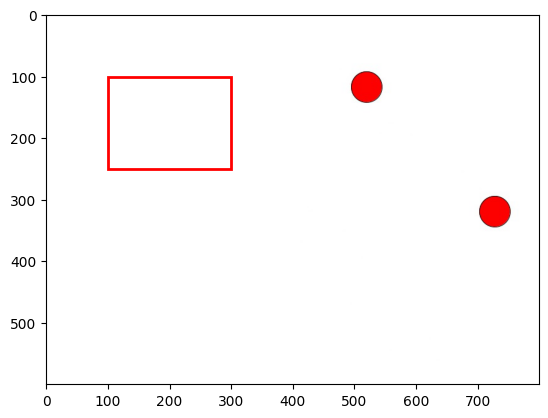

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/training_images/105.jpg'
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the bounding box coordinates
x_min = 100
y_min = 100
width = 200
height = 150

# Create a rectangle patch
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
# Add the rectangle patch to the axes
ax.add_patch(rect)
# Show the plot
plt.show()

In [5]:
!wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv

--2023-05-15 20:19:56--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9314 (9.1K) [text/plain]
Saving to: ‘bounding_box_coordinates.csv’

bounding_box_coordi 100%[===================>]   9.10K  --.-KB/s    in 0s      

2023-05-15 20:19:56 (74.4 MB/s) - ‘bounding_box_coordinates.csv’ saved [9314/9314]



In [6]:
import csv

# Path to the CSV file
csv_path = 'bounding_box_coordinates.csv'

# Open the CSV file
with open(csv_path, 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)
    
    # Initialize an empty list to store the data
    data = []
    
    # Read and process each row
    for row in reader:
        # Convert row values to numbers and append to the data list
        row_numbers = [float(value) for value in row]
        data.append(row_numbers)

In [7]:
FRAME_N = 40

In [8]:
data[FRAME_N]

[621.0, 671.0, 548.0, 598.0, 539.0, 589.0, 480.0, 530.0]

In [73]:
def convert_coordinates(min_x, max_x, min_y, max_y):
    x_min = min_x
    y_min = min_y
    width = max_x - min_x
    height = max_y - min_y
    return x_min, y_min, width, height

def display_image_with_bounding_boxes(image_filename, bounding_boxes):
    # Load the image
    image = Image.open(image_filename)

    display_matrix_with_boxes(image, bounding_boxes)


def display_Image_matrix_with_boxes(image, bounding_boxes):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the plot
    for bbox in bounding_boxes:
        print(bbox)
        x_min, y_min, width, height = convert_coordinates(*bbox)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

[621.0, 671.0, 548.0, 598.0]
[539.0, 589.0, 480.0, 530.0]


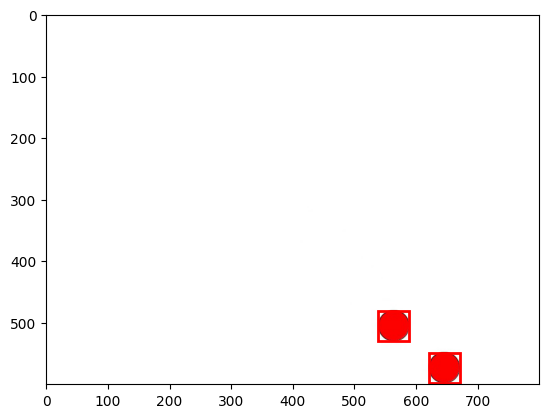

In [10]:
display_image_with_bounding_boxes(f'training_images/{FRAME_N}.jpg',
                                  [data[FRAME_N][:4], data[FRAME_N][4:]])

In [11]:
import os
import cv2
import numpy as np

In [12]:
# Folder path containing the images
folder_path = 'training_images'

# Get a list of image file names in the folder
image_count = len(os.listdir(folder_path))

# Initialize an empty list to store the loaded images
images = []

# Loop through the images in the folder
for i in range(image_count):  # Assuming you have 100 images (adjust the range accordingly)
    image_path = os.path.join(folder_path, f'{i}.jpg')
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
    # image = preprocess_image(image)  # Preprocess the image (if necessary)
    images.append(image)

# Convert the list of images to a numpy array
images = np.array(images)

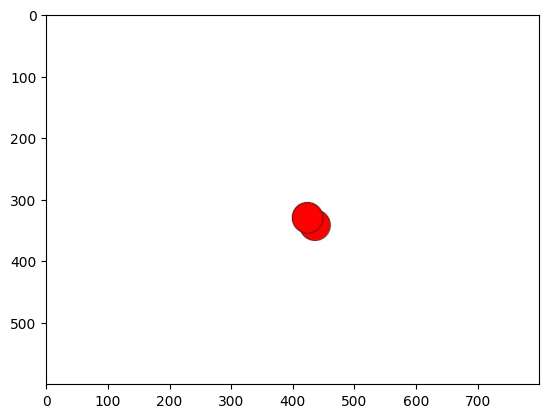

In [13]:
plt.imshow(images[5])

In [14]:
X = images / 255.

In [15]:
X.shape

(300, 600, 800, 3)

In [16]:
# min_x, max_x, min_y, max_y

In [17]:
data[0]

[381.0, 431.0, 282.0, 332.0, 379.0, 429.0, 280.0, 330.0]

In [18]:
# normalise label coordinates

np_labels = np.array(data)

# Scaling factors for each column
scaling_factors = np.array([800., 800., 600., 600., 800., 800., 600., 600.])

# Scale the columns by different values
scaled_matrix = np_labels / scaling_factors

print(scaled_matrix)

[[0.47625    0.53875    0.47       ... 0.53625    0.46666667 0.55      ]
 [0.48375    0.54625    0.48166667 ... 0.54125    0.475      0.55833333]
 [0.49125    0.55375    0.49333333 ... 0.54625    0.48333333 0.56666667]
 ...
 [0.81375    0.87625    0.20166667 ... 0.14125    0.725      0.80833333]
 [0.82125    0.88375    0.21333333 ... 0.14625    0.71666667 0.8       ]
 [0.82875    0.89125    0.225      ... 0.15125    0.70833333 0.79166667]]


In [19]:
scaled_matrix.shape

(300, 8)

In [20]:
y = scaled_matrix

In [21]:
X.shape, y.shape

((300, 600, 800, 3), (300, 8))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train = X[:100] 
X_test = X[100:] 
y_train = y[:100] 
y_test = y[100:] 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 600, 800, 3), (200, 600, 800, 3), (100, 8), (200, 8))

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                       test_size=0.2, random_state=42)

In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


In [26]:

# Load and preprocess your dataset
# X_train: input images
# y_train: bounding box coordinates of the two objects
image_height=600
image_width=800
image_channels=3

In [41]:


# Define the model architecture
input_shape = (image_height, image_width, image_channels)
inputs = Input(shape=input_shape)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(8, activation='linear')(x)  # Output layer with 8 neurons for 2 bounding box coordinates



In [42]:
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [43]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600, 800, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 598, 798, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 199, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 197, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 47, 64)        1849

In [90]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
# Train the model
# model.fit(X_train, y_train, batch_size=6, epochs=20, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))



Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 0.2477 - val_loss: 0.0840
Epoch 2/10
10/10 [==============================] - 8s 863ms/step - loss: 0.2302 - val_loss: 0.0765
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.2071 - val_loss: 0.0746
Epoch 4/10
10/10 [==============================] - 8s 868ms/step - loss: 0.1748 - val_loss: 0.0739
Epoch 5/10
10/10 [==============================] - 8s 863ms/step - loss: 0.1555 - val_loss: 0.0729
Epoch 6/10
10/10 [==============================] - 8s 875ms/step - loss: 0.1823 - val_loss: 0.0812
Epoch 7/10
10/10 [==============================] - 8s 873ms/step - loss: 0.1912 - val_loss: 0.0725
Epoch 8/10
10/10 [==============================] - 8s 868ms/step - loss: 0.1782 - val_loss: 0.0741
Epoch 9/10
10/10 [==============================] - 8s 881ms/step - loss: 0.1619 - val_loss: 0.0738
Epoch 10/10
10/10 [==============================] - 8s 885ms/step - loss: 0.1611 - val_loss: 0.0715


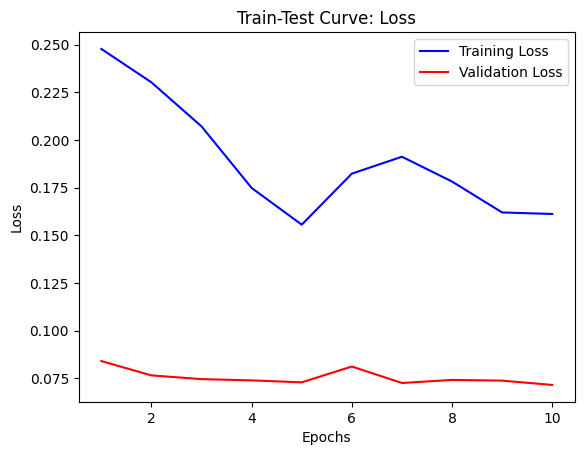

In [99]:
# Extract training and validation metrics from the history object
train_loss = history.history['loss']
# train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
# val_acc = history.history['val_accuracy']

# Plot the train-test curve
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train-Test Curve: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.figure()
# plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Train-Test Curve: Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [100]:
# images = X_test

np.random.seed(42)
# Sample 5 random indices
random_indices = np.random.choice(X_train.shape[0], size=5, replace=False)

random_x = X_train[random_indices]
random_y = y_train[random_indices]

In [101]:
random_y

array([[0.78375   , 0.84625   , 0.41166667, 0.495     , 0.88875   ,
        0.95125   , 0.675     , 0.75833333],
       [0.87375   , 0.93625   , 0.76166667, 0.845     , 0.73875   ,
        0.80125   , 0.90833333, 0.99166667],
       [0.88125   , 0.94375   , 0.56333333, 0.64666667, 0.82375   ,
        0.88625   , 0.78333333, 0.86666667],
       [0.81375   , 0.87625   , 0.855     , 0.93833333, 0.69875   ,
        0.76125   , 0.84166667, 0.925     ],
       [0.80625   , 0.86875   , 0.86666667, 0.95      , 0.69375   ,
        0.75625   , 0.83333333, 0.91666667]])

In [102]:
random_x_predict = model.predict(random_x)

1/1 [==============================] - 0s 53ms/step


In [103]:
scale_random_x_predict = random_x_predict * scaling_factors
scale_random_x_predict


array([[319.58236694, 388.28833103, 239.41192031, 240.01414776,
        313.26408386, 341.69616699, 280.32765985, 301.12549067],
       [341.96987152, 425.25177002, 267.26108193, 257.01831579,
        336.72075272, 365.84839821, 307.39502907, 337.39578724],
       [332.47585297, 411.21244431, 256.99616075, 250.20037293,
        327.43253708, 355.99308014, 297.38300443, 324.45759773],
       [345.58348656, 427.70061493, 268.43377948, 258.91769528,
        339.08963203, 368.91465187, 308.61060619, 337.99721003],
       [345.71456909, 427.55670547, 268.25648546, 258.93069506,
        339.0818119 , 368.97082329, 308.44606161, 337.6714468 ]])

[319.58236694 388.28833103 239.41192031 240.01414776]
[313.26408386 341.69616699 280.32765985 301.12549067]


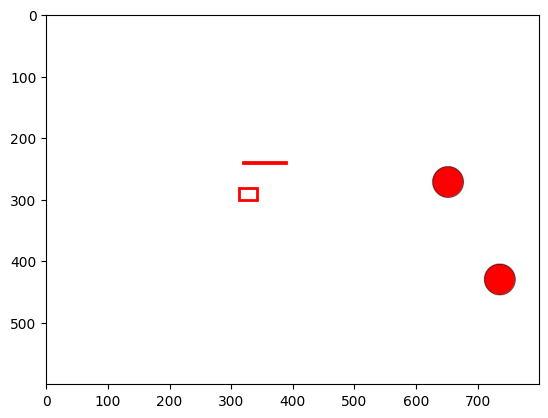

[341.96987152 425.25177002 267.26108193 257.01831579]
[336.72075272 365.84839821 307.39502907 337.39578724]


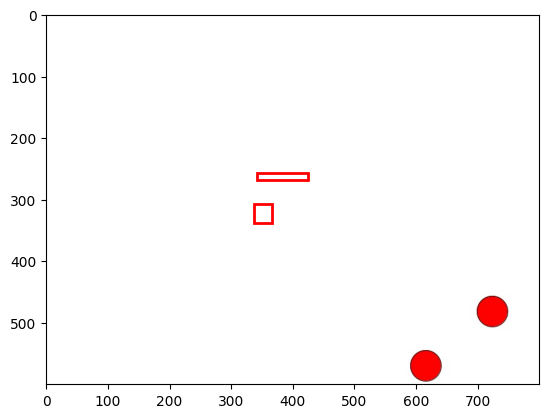

[332.47585297 411.21244431 256.99616075 250.20037293]
[327.43253708 355.99308014 297.38300443 324.45759773]


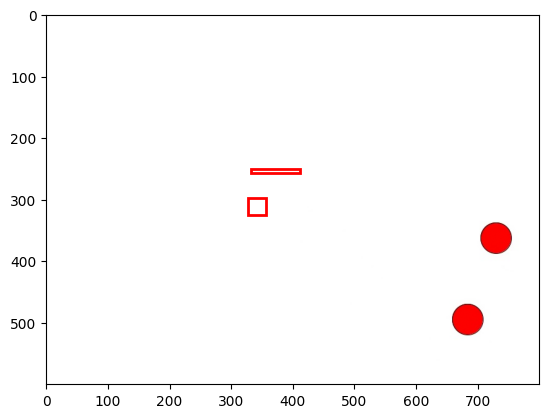

[345.58348656 427.70061493 268.43377948 258.91769528]
[339.08963203 368.91465187 308.61060619 337.99721003]


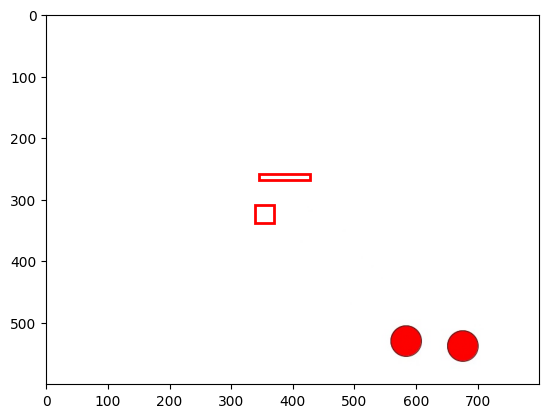

[345.71456909 427.55670547 268.25648546 258.93069506]
[339.0818119  368.97082329 308.44606161 337.6714468 ]


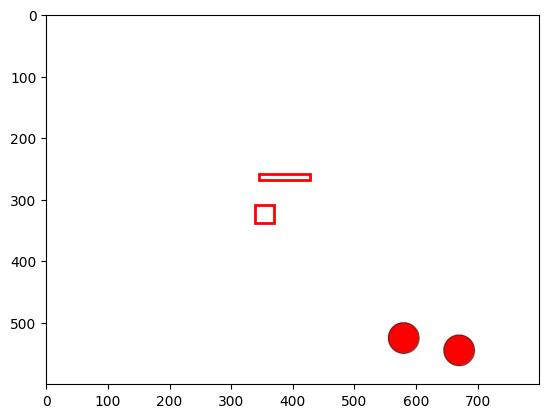

In [104]:
# # Create a figure and subplot grid
# fig, axs = plt.subplots(5, 1, figsize=(12, 4))

# Loop through the random indices and display the images
for i in range(len(random_x)):
    image = random_x[i]
    prediction = scale_random_x_predict[i]
    display_Image_matrix_with_boxes(image,  [prediction[:4], prediction[4:]])

In [33]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 134ms/step - loss: 0.2060


0.20602598786354065

In [88]:
from tensorflow import keras
from tensorflow.keras import layers

def custom_object_detection_model(input_shape):
    # Backbone CNN
    backbone = keras.applications.ResNet50(
        include_top=False,  # Exclude fully-connected layers
        weights='imagenet',  # Pre-trained weights
        input_shape=input_shape,
    )
    
    # Freeze the backbone layers to prevent training
    backbone.trainable = False
    
    # Create the detection head
    detection_head = backbone.output
    detection_head = layers.GlobalAveragePooling2D()(detection_head)
    detection_head = layers.Dense(64, activation='relu')(detection_head)
    detection_head = layers.Dropout(0.5)(detection_head)
    detection_head = layers.Dense(8, activation='linear')(detection_head)
    
    # Combine the backbone and detection head into a single model
    model = keras.Model(inputs=backbone.input, outputs=detection_head)
    
    return model

# Example usage:
input_shape = (600, 800, 3)  # Specify the input shape of your images

model = custom_object_detection_model(input_shape)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 600, 800, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 606, 806, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 300, 400, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            